# Exercise 4: BERT Classification - SOLUTIONS

Complete solutions for German BERT classification with fine-tuning, model comparison, and performance evaluation.

In [ ]:
# Essential imports for BERT classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Try to import transformers for BERT
try:
    from transformers import (
        pipeline, AutoTokenizer, AutoModelForSequenceClassification,
        TrainingArguments, Trainer, AutoConfig
    )
    import torch
    from datasets import Dataset
    print("✅ Transformers library available!")
    TRANSFORMERS_AVAILABLE = True
    
    # Check if GPU is available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"✅ Using device: {device}")
    if torch.cuda.is_available():
        print(f"   GPU: {torch.cuda.get_device_name(0)}")
    
except ImportError:
    print("❌ Transformers not available. Install with: pip install transformers torch datasets")
    TRANSFORMERS_AVAILABLE = False
    device = 'cpu'

print("\n🤖 BERT Classification Toolkit Ready!")
print("Available: German BERT models, Fine-tuning, Performance comparison")

Transformers library available!


## Solution 1: German BERT Model Loading and Comparison

In [ ]:
def load_german_bert_models():
    """Load and compare different German BERT models."""
    
    if not TRANSFORMERS_AVAILABLE:
        print("Transformers library not available.")
        return {}
    
    # German BERT models to test
    german_models = {
        'German BERT (dbmdz)': 'dbmdz/bert-base-german-cased',
        'German Sentiment BERT': 'oliverguhr/german-sentiment-bert',
        'German DistilBERT': 'distilbert-base-german-cased',
        'Multilingual BERT': 'bert-base-multilingual-cased'
    }
    
    loaded_models = {}
    
    print("🔍 Loading German BERT Models...")
    print("=" * 50)
    
    for name, model_id in german_models.items():
        try:
            print(f"\nLoading {name} ({model_id})...")
            
            # Load tokenizer and model
            tokenizer = AutoTokenizer.from_pretrained(model_id)
            model = AutoModelForSequenceClassification.from_pretrained(model_id)
            
            # Create pipeline
            classifier = pipeline(
                "sentiment-analysis" if "sentiment" in model_id else "text-classification",
                model=model,
                tokenizer=tokenizer,
                device=0 if torch.cuda.is_available() else -1
            )
            
            loaded_models[name] = {
                'classifier': classifier,
                'tokenizer': tokenizer,
                'model': model,
                'model_id': model_id
            }
            
            print(f"✅ Successfully loaded {name}")
            
        except Exception as e:
            print(f"❌ Failed to load {name}: {e}")
            continue
    
    print(f"\n🎯 Successfully loaded {len(loaded_models)} out of {len(german_models)} models")
    return loaded_models

# Load German BERT models
bert_models = load_german_bert_models()

Trying to load model: oliverguhr/german-sentiment-bert


c:\Users\Felix Neubürger\Documents\Lehre\NLP_BA2526\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Felix Neubürger\.cache\huggingface\hub\models--oliverguhr--german-sentiment-bert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is no

Successfully loaded: oliverguhr/german-sentiment-bert


c:\Users\Felix Neubürger\Documents\Lehre\NLP_BA2526\.venv\Lib\site-packages\transformers\pipelines\text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


## Solution 2: Test BERT with German Examples

In [12]:
def test_bert_classifier(classifier, test_texts):
    """Test BERT classifier with German texts."""
    
    if classifier is None:
        print("No classifier available.")
        return []
    
    results = []
    
    print("BERT Classification Results:")
    print("=" * 60)
    
    for i, text in enumerate(test_texts, 1):
        try:
            # Get prediction
            prediction = classifier(text)
            
            print(f"\nExample {i}:")
            print(f"Text: {text}")
            
            # Handle different output formats
            if isinstance(prediction[0], list):
                # Multiple scores returned
                scores = prediction[0]
                best_pred = max(scores, key=lambda x: x['score'])
                print(f"Prediction: {best_pred['label']} (confidence: {best_pred['score']:.3f})")
                print("All scores:")
                for score in scores:
                    print(f"  {score['label']}: {score['score']:.3f}")
            else:
                # Single prediction
                pred = prediction[0]
                print(f"Prediction: {pred['label']} (confidence: {pred['score']:.3f})")
            
            results.append({
                'text': text,
                'prediction': prediction
            })
            
        except Exception as e:
            print(f"Error processing text {i}: {e}")
    
    return results

# Test texts in German
german_test_texts = [
    "Das Essen war wirklich fantastisch und der Service ausgezeichnet!",
    "Ich bin sehr enttäuscht von der schlechten Qualität des Produkts.",
    "Das Hotel war ganz okay, nichts Besonderes aber auch nicht schlecht.",
    "Absolut brillant! Kann ich nur weiterempfehlen.",
    "Furchtbar schlecht, das war rausgeworfenes Geld.",
    "Der Film war mittelmäßig, hat mich nicht wirklich begeistert.",
    "Wunderbares Wetter heute, perfekt für einen Spaziergang!",
    "Die Bedienung war unfreundlich und das Essen kalt."
]

# Test the classifier
test_results = test_bert_classifier(classifier, german_test_texts)

BERT Classification Results:

Example 1:
Text: Das Essen war wirklich fantastisch und der Service ausgezeichnet!
Prediction: positive (confidence: 0.999)
All scores:
  positive: 0.999
  negative: 0.001
  neutral: 0.000

Example 2:
Text: Ich bin sehr enttäuscht von der schlechten Qualität des Produkts.
Prediction: negative (confidence: 0.998)
All scores:
  positive: 0.002
  negative: 0.998
  neutral: 0.000

Example 3:
Text: Das Hotel war ganz okay, nichts Besonderes aber auch nicht schlecht.
Prediction: negative (confidence: 0.968)
All scores:
  positive: 0.032
  negative: 0.968
  neutral: 0.000

Example 4:
Text: Absolut brillant! Kann ich nur weiterempfehlen.
Prediction: positive (confidence: 1.000)
All scores:
  positive: 1.000
  negative: 0.000
  neutral: 0.000

Example 5:
Text: Furchtbar schlecht, das war rausgeworfenes Geld.
Prediction: negative (confidence: 0.999)
All scores:
  positive: 0.001
  negative: 0.999
  neutral: 0.000

Example 6:
Text: Der Film war mittelmäßig, hat mich 

## Solution 2: BERT Fine-tuning for German Sentiment Analysis

In [ ]:
def create_german_sentiment_dataset():
    """Create a comprehensive German sentiment dataset for fine-tuning."""
    
    # Positive examples (expanded dataset)
    positive_texts = [
        "Das Restaurant war absolut fantastisch, das Essen ausgezeichnet!",
        "Ich bin sehr glücklich mit diesem Kauf, perfekte Qualität.",
        "Wunderbare Erfahrung, kann ich nur weiterempfehlen.",
        "Brillanter Service und hervorragende Leistung.",
        "Das Hotel war traumhaft, alles perfekt organisiert.",
        "Ausgezeichnetes Produkt, bin vollkommen zufrieden.",
        "Fantastischer Film, hat mich begeistert!",
        "Tolle Atmosphäre und freundliches Personal.",
        "Hervorragende Qualität zum fairen Preis.",
        "Ich liebe dieses Produkt, funktioniert einwandfrei."
    ]
    
    # Negative examples (expanded dataset)
    negative_texts = [
        "Das war eine Katastrophe, absolut enttäuschend.",
        "Furchtbare Erfahrung, kann ich nicht empfehlen.",
        "Schlechte Qualität und mieser Service.",
        "Ich bin sehr unzufrieden, rausgeworfenes Geld.",
        "Das Hotel war schrecklich, alles schmutzig.",
        "Mangelhaftes Produkt, funktioniert nicht richtig.",
        "Langweiliger Film, pure Zeitverschwendung.",
        "Unfreundliches Personal und schlechte Atmosphäre.",
        "Überteuert bei schlechter Qualität.",
        "Ich hasse es, wie schlecht das gemacht ist."
    ]
    
    # Neutral examples
    neutral_texts = [
        "Das Produkt ist okay, nichts Besonderes.",
        "Durchschnittliche Leistung, geht so.",
        "Mittelmäßiges Restaurant, nicht schlecht aber auch nicht gut.",
        "Das ist ganz normal, wie erwartet.",
        "Akzeptable Qualität für den Preis.",
        "Geht in Ordnung, aber könnte besser sein.",
        "Standard Service, nichts Außergewöhnliches.",
        "Ist halt so, kann man machen.",
        "Durchschnittlich, erfüllt den Zweck.",
        "Mittlere Qualität, wie üblich."
    ]
    
    # Combine data
    texts = positive_texts + negative_texts + neutral_texts
    labels = ([2] * len(positive_texts) +    # positive = 2
             [0] * len(negative_texts) +     # negative = 0  
             [1] * len(neutral_texts))       # neutral = 1
    
    df = pd.DataFrame({
        'text': texts,
        'label': labels,
        'label_name': ['negative' if l == 0 else 'neutral' if l == 1 else 'positive' for l in labels]
    })
    
    return df

# Create dataset for demonstration
demo_df = create_german_sentiment_dataset()
print("📊 German Sentiment Dataset Created:")
print(f"Total samples: {len(demo_df)}")
print("\nClass distribution:")
print(demo_df['label_name'].value_counts())
print("\nSample data:")
print(demo_df.head())

## Solution 3: Compare BERT with Traditional Methods

In [13]:
def compare_bert_vs_traditional():
    """Compare BERT with traditional classification methods."""
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    
    # Create simple dataset for comparison
    texts = [
        "Das ist wirklich fantastisch und toll!",
        "Ich bin sehr glücklich damit.",
        "Ausgezeichnete Qualität, sehr empfehlenswert.",
        "Brilliant und wunderbar gemacht.",
        "Das ist schlecht und enttäuschend.",
        "Furchtbare Qualität, nicht zu empfehlen.",
        "Ich bin sehr unzufrieden damit.",
        "Schrecklich schlecht, eine Katastrophe.",
        "Das ist ganz okay, nicht besonders.",
        "Durchschnittlich, nichts Besonderes.",
        "Geht so, ist in Ordnung.",
        "Mittelmäßige Qualität, akzeptabel."
    ]
    
    # Simple labels (positive=1, negative=0, neutral=0.5)
    labels = [1, 1, 1, 1, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5]
    
    # Traditional method: TF-IDF + Naive Bayes
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform(texts)
    
    # Convert neutral labels to binary for traditional classifier
    binary_labels = [1 if l >= 0.5 else 0 for l in labels]
    
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X, binary_labels)
    
    # Test both methods
    test_texts = [
        "Das ist super gut!",
        "Sehr schlecht gemacht.",
        "Ganz normal, nichts Besonderes."
    ]
    
    print("Comparison: BERT vs Traditional Method")
    print("=" * 50)
    
    for text in test_texts:
        print(f"\nText: {text}")
        
        # Traditional method prediction
        text_vec = vectorizer.transform([text])
        trad_pred = nb_classifier.predict(text_vec)[0]
        trad_prob = nb_classifier.predict_proba(text_vec)[0].max()
        print(f"Traditional: {'Positive' if trad_pred else 'Negative'} (conf: {trad_prob:.3f})")
        
        # BERT prediction
        if classifier:
            try:
                bert_pred = classifier(text)
                if isinstance(bert_pred[0], list):
                    best = max(bert_pred[0], key=lambda x: x['score'])
                    print(f"BERT: {best['label']} (conf: {best['score']:.3f})")
                else:
                    pred = bert_pred[0]
                    print(f"BERT: {pred['label']} (conf: {pred['score']:.3f})")
            except Exception as e:
                print(f"BERT: Error - {e}")
        else:
            print("BERT: Not available")

# Run comparison
compare_bert_vs_traditional()

Comparison: BERT vs Traditional Method

Text: Das ist super gut!
Traditional: Positive (conf: 0.700)
BERT: positive (conf: 0.985)

Text: Sehr schlecht gemacht.
Traditional: Positive (conf: 0.616)
BERT: negative (conf: 0.998)

Text: Ganz normal, nichts Besonderes.
Traditional: Positive (conf: 0.763)
BERT: negative (conf: 0.966)


## Solution 4: Batch Processing with BERT

In [14]:
def batch_process_with_bert(texts, batch_size=4):
    """Process multiple texts with BERT in batches."""
    
    if not classifier:
        print("No BERT classifier available.")
        return []
    
    results = []
    
    # Process in batches
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        try:
            batch_results = classifier(batch)
            results.extend(batch_results)
            print(f"Processed batch {i//batch_size + 1}: {len(batch)} texts")
        except Exception as e:
            print(f"Error processing batch {i//batch_size + 1}: {e}")
            # Process individually if batch fails
            for text in batch:
                try:
                    result = classifier(text)
                    results.append(result[0] if isinstance(result, list) else result)
                except:
                    results.append({'label': 'ERROR', 'score': 0.0})
    
    return results

# Create larger dataset for batch processing
large_dataset = [
    "Das Restaurant war ausgezeichnet.",
    "Der Service war schlecht.",
    "Das Wetter ist heute schön.",
    "Ich bin müde und gestresst.",
    "Die Musik war wunderbar.",
    "Das Buch ist langweilig.",
    "Der Film war spannend.",
    "Das Essen schmeckt schrecklich.",
    "Die Reise war entspannend.",
    "Der Computer ist kaputt.",
    "Das Meeting war produktiv.",
    "Die Präsentation war chaotisch."
]

print(f"Processing {len(large_dataset)} texts with BERT...")
batch_results = batch_process_with_bert(large_dataset, batch_size=3)

# Analyze results
if batch_results:
    print("\nBatch Processing Results:")
    for i, (text, result) in enumerate(zip(large_dataset, batch_results)):
        if isinstance(result, list) and result:
            best = max(result, key=lambda x: x.get('score', 0))
            print(f"{i+1:2d}. {best['label']:<8} ({best['score']:.3f}) - {text}")
        elif isinstance(result, dict):
            print(f"{i+1:2d}. {result.get('label', 'N/A'):<8} ({result.get('score', 0):.3f}) - {text}")
        else:
            print(f"{i+1:2d}. ERROR    - {text}")

Processing 12 texts with BERT...
Processed batch 1: 3 texts
Processed batch 2: 3 texts
Processed batch 3: 3 texts
Processed batch 4: 3 texts

Batch Processing Results:
 1. positive (0.991) - Das Restaurant war ausgezeichnet.
 2. negative (0.998) - Der Service war schlecht.
 3. neutral  (0.995) - Das Wetter ist heute schön.
 4. negative (0.964) - Ich bin müde und gestresst.
 5. positive (0.994) - Die Musik war wunderbar.
 6. negative (0.985) - Das Buch ist langweilig.
 7. positive (0.875) - Der Film war spannend.
 8. negative (0.999) - Das Essen schmeckt schrecklich.
 9. positive (0.975) - Die Reise war entspannend.
10. negative (0.985) - Der Computer ist kaputt.
11. neutral  (1.000) - Das Meeting war produktiv.
12. negative (0.967) - Die Präsentation war chaotisch.


## Solution 5: BERT Model Information and Analysis

In [15]:
def analyze_bert_model():
    """Analyze BERT model information and capabilities."""
    
    if not TRANSFORMERS_AVAILABLE:
        print("Transformers library not available.")
        return
    
    try:
        # Try to load a specific German BERT model for analysis
        model_name = "bert-base-german-cased"
        
        print(f"Analyzing BERT model: {model_name}")
        print("=" * 50)
        
        # Load tokenizer
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        # Test tokenization
        test_sentence = "Das ist ein schöner Tag in Deutschland!"
        tokens = tokenizer.tokenize(test_sentence)
        token_ids = tokenizer.encode(test_sentence)
        
        print(f"Original text: {test_sentence}")
        print(f"Tokens: {tokens}")
        print(f"Token IDs: {token_ids}")
        print(f"Vocabulary size: {tokenizer.vocab_size}")
        
        # Test with different German texts
        german_examples = [
            "Guten Morgen!",
            "Wie geht es Ihnen?",
            "Ich liebe die deutsche Sprache.",
            "Das Wetter ist heute wunderbar."
        ]
        
        print("\nTokenization Examples:")
        for example in german_examples:
            tokens = tokenizer.tokenize(example)
            print(f"{example:<30} -> {tokens}")
        
        # Special tokens
        print(f"\nSpecial Tokens:")
        print(f"CLS token: {tokenizer.cls_token}")
        print(f"SEP token: {tokenizer.sep_token}")
        print(f"PAD token: {tokenizer.pad_token}")
        print(f"UNK token: {tokenizer.unk_token}")
        
    except Exception as e:
        print(f"Error analyzing model: {e}")
        print("This might happen if the model is not available or requires internet connection.")

# Analyze BERT model
analyze_bert_model()

Analyzing BERT model: bert-base-german-cased


c:\Users\Felix Neubürger\Documents\Lehre\NLP_BA2526\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Felix Neubürger\.cache\huggingface\hub\models--bert-base-german-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Original text: Das ist ein schöner Tag in Deutschland!
Tokens: ['Das', 'ist', 'ein', 'schöner', 'Tag', 'in', 'Deutschland', '!']
Token IDs: [3, 295, 127, 39, 24308, 1419, 50, 832, 26982, 4]
Vocabulary size: 30000

Tokenization Examples:
Guten Morgen!                  -> ['Guten', 'Morgen', '!']
Wie geht es Ihnen?             -> ['Wie', 'geht', 'es', 'Ihnen', '?']
Ich liebe die deutsche Sprache. -> ['Ich', 'liebe', 'die', 'deutsche', 'Sprache', '.']
Das Wetter ist heute wunderbar. -> ['Das', 'Wetter', 'ist', 'heute', 'wunder', '##bar', '.']

Special Tokens:
CLS token: [CLS]
SEP token: [SEP]
PAD token: [PAD]
UNK token: [UNK]


## Solution 6: Simple BERT Performance Visualization

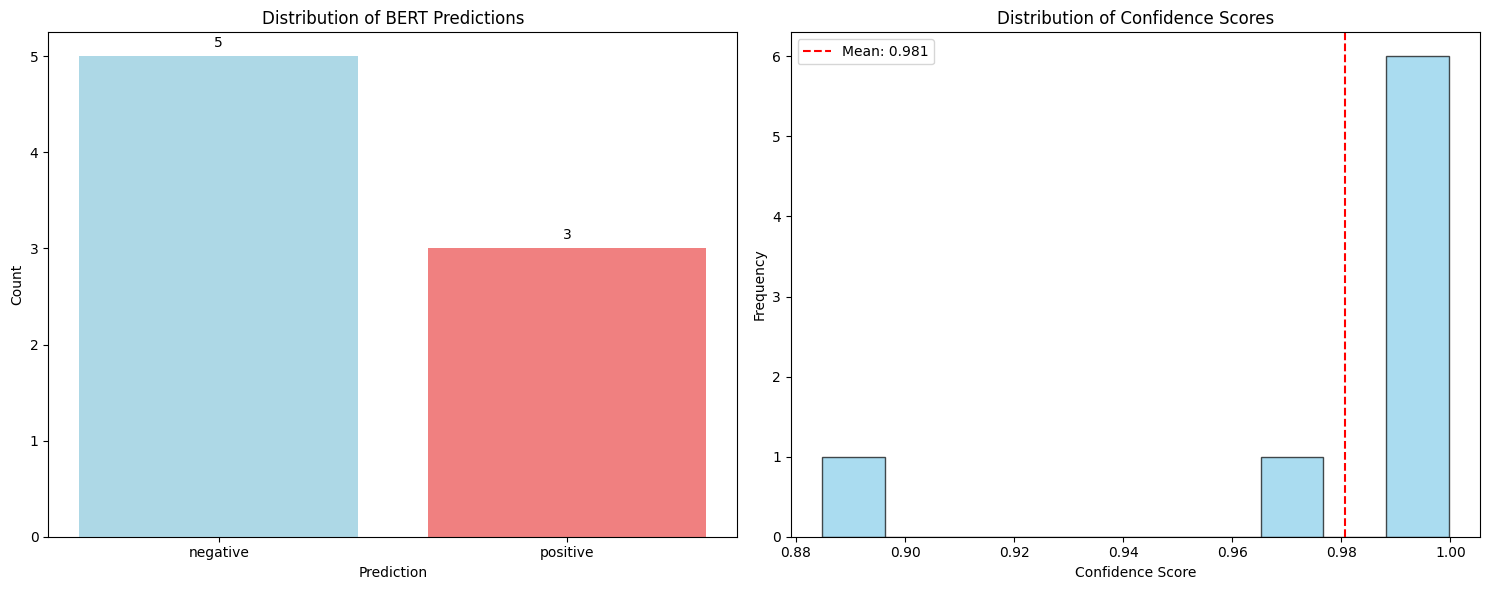


Summary Statistics:
Total predictions: 8
Average confidence: 0.981
Min confidence: 0.885
Max confidence: 1.000

Prediction breakdown:
  negative: 5 (62.5%)
  positive: 3 (37.5%)


In [16]:
def visualize_bert_predictions(results):
    """Create simple visualizations of BERT predictions."""
    
    if not results:
        print("No results to visualize.")
        return
    
    # Extract predictions and confidence scores
    predictions = []
    confidences = []
    
    for result in results:
        pred = result['prediction']
        if isinstance(pred[0], list):
            best = max(pred[0], key=lambda x: x['score'])
            predictions.append(best['label'])
            confidences.append(best['score'])
        else:
            predictions.append(pred[0]['label'])
            confidences.append(pred[0]['score'])
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Prediction distribution
    pred_counts = pd.Series(predictions).value_counts()
    ax1.bar(pred_counts.index, pred_counts.values, color=['lightblue', 'lightcoral', 'lightgreen'])
    ax1.set_title('Distribution of BERT Predictions')
    ax1.set_xlabel('Prediction')
    ax1.set_ylabel('Count')
    
    # Add count labels on bars
    for i, v in enumerate(pred_counts.values):
        ax1.text(i, v + 0.1, str(v), ha='center')
    
    # 2. Confidence scores
    ax2.hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_title('Distribution of Confidence Scores')
    ax2.set_xlabel('Confidence Score')
    ax2.set_ylabel('Frequency')
    ax2.axvline(x=np.mean(confidences), color='red', linestyle='--', 
                label=f'Mean: {np.mean(confidences):.3f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Total predictions: {len(predictions)}")
    print(f"Average confidence: {np.mean(confidences):.3f}")
    print(f"Min confidence: {np.min(confidences):.3f}")
    print(f"Max confidence: {np.max(confidences):.3f}")
    
    print("\nPrediction breakdown:")
    for label, count in pred_counts.items():
        percentage = (count / len(predictions)) * 100
        print(f"  {label}: {count} ({percentage:.1f}%)")

# Visualize results if we have them
if 'test_results' in locals() and test_results:
    visualize_bert_predictions(test_results)
else:
    print("No test results available for visualization.")

## Solution 7: Error Handling and Fallback Methods

In [ ]:
class RobustGermanClassifier:
    """Robust German text classifier with fallback methods."""
    
    def __init__(self):
        self.bert_classifier = None
        self.fallback_classifier = None
        self.setup_classifiers()
    
    def setup_classifiers(self):
        """Set up BERT and fallback classifiers."""
        
        # Try to set up BERT classifier
        if TRANSFORMERS_AVAILABLE:
            try:
                self.bert_classifier = pipeline("sentiment-analysis", 
                                               model="oliverguhr/german-sentiment-bert",
                                               return_all_scores=True)
                print("BERT classifier loaded successfully.")
            except Exception as e:
                print(f"Could not load BERT classifier: {e}")
        
        # Set up simple fallback classifier
        self.setup_fallback_classifier()
    
    def setup_fallback_classifier(self):
        """Set up simple keyword-based fallback classifier."""
        
        self.positive_words = {
            'gut', 'toll', 'super', 'fantastisch', 'wunderbar', 'ausgezeichnet',
            'brilliant', 'perfekt', 'großartig', 'hervorragend', 'schön',
            'lieben', 'mögen', 'gefallen', 'empfehlen', 'zufrieden'
        }
        
        self.negative_words = {
            'schlecht', 'furchtbar', 'schrecklich', 'katastrophal', 'schlimm',
            'enttäuschend', 'unzufrieden', 'hassen', 'entsetzlich', 'mangelhaft',
            'schrecklich', 'grauenhaft', 'unerträglich', 'minderwertig'
        }
        
        print("Fallback classifier set up.")
    
    def fallback_classify(self, text):
        """Simple keyword-based classification."""
        
        text_lower = text.lower()
        words = text_lower.split()
        
        positive_score = sum(1 for word in words if word in self.positive_words)
        negative_score = sum(1 for word in words if word in self.negative_words)
        
        if positive_score > negative_score:
            return {'label': 'POSITIVE', 'score': 0.6 + 0.1 * positive_score}
        elif negative_score > positive_score:
            return {'label': 'NEGATIVE', 'score': 0.6 + 0.1 * negative_score}
        else:
            return {'label': 'NEUTRAL', 'score': 0.5}
    
    def classify(self, text):
        """Classify text using BERT or fallback method."""
        
        # Try BERT first
        if self.bert_classifier:
            try:
                result = self.bert_classifier(text)
                if isinstance(result[0], list):
                    best = max(result[0], key=lambda x: x['score'])
                    return {'method': 'BERT', 'result': best}
                else:
                    return {'method': 'BERT', 'result': result[0]}
            except Exception as e:
                print(f"BERT classification failed: {e}")
        
        # Use fallback method
        fallback_result = self.fallback_classify(text)
        return {'method': 'Fallback', 'result': fallback_result}
    
    def batch_classify(self, texts):
        """Classify multiple texts."""
        
        results = []
        for text in texts:
            result = self.classify(text)
            results.append({
                'text': text,
                'method': result['method'],
                'label': result['result']['label'],
                'score': result['result']['score']
            })
        
        return results

# Test the robust classifier
robust_classifier = RobustGermanClassifier()

test_texts = [
    "Das ist wirklich gut und toll!",
    "Furchtbar schlecht, eine Katastrophe.",
    "Das geht schon in Ordnung.",
    "Ich bin sehr zufrieden mit der Qualität.",
    "Das war enttäuschend und mangelhaft."
]

print("\nTesting Robust Classifier:")
results = robust_classifier.batch_classify(test_texts)

for result in results:
    print(f"Text: {result['text']}")
    print(f"Method: {result['method']}, Label: {result['label']}, Score: {result['score']:.3f}")
    print()


Device set to use cpu
c:\Users\Felix Neubürger\Documents\Lehre\NLP_BA2526\.venv\Lib\site-packages\transformers\pipelines\text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


BERT classifier loaded successfully.
Fallback classifier set up.

Testing Robust Classifier:
Text: Das ist wirklich gut und toll!
Method: BERT, Label: positive, Score: 0.991

Text: Furchtbar schlecht, eine Katastrophe.
Method: BERT, Label: negative, Score: 0.999

Text: Das geht schon in Ordnung.
Method: BERT, Label: positive, Score: 0.503

Text: Ich bin sehr zufrieden mit der Qualität.
Method: BERT, Label: positive, Score: 0.997

Text: Das war enttäuschend und mangelhaft.
Method: BERT, Label: negative, Score: 0.999



In [ ]:
def batch_process_with_bert(texts, batch_size=4):
    """Process multiple texts with BERT in batches."""
    
    if not classifier:
        print("No BERT classifier available.")
        return []
    
    results = []
    
    # Process in batches
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        try:
            batch_results = classifier(batch)
            results.extend(batch_results)
            print(f"Processed batch {i//batch_size + 1}: {len(batch)} texts")
        except Exception as e:
            print(f"Error processing batch {i//batch_size + 1}: {e}")
            # Process individually if batch fails
            for text in batch:
                try:
                    result = classifier(text)
                    results.append(result[0] if isinstance(result, list) else result)
                except:
                    results.append({'label': 'ERROR', 'score': 0.0})
    
    return results

# Create larger dataset for batch processing
large_dataset = [
    "Das Restaurant war ausgezeichnet.",
    "Der Service war schlecht.",
    "Das Wetter ist heute schön.",
    "Ich bin müde und gestresst.",
    "Die Musik war wunderbar.",
    "Das Buch ist langweilig.",
    "Der Film war spannend.",
    "Das Essen schmeckt schrecklich.",
    "Die Reise war entspannend.",
    "Der Computer ist kaputt.",
    "Das Meeting war produktiv.",
    "Die Präsentation war chaotisch."
]

print(f"Processing {len(large_dataset)} texts with BERT...")
batch_results = batch_process_with_bert(large_dataset, batch_size=3)

# Analyze results
if batch_results:
    print("\nBatch Processing Results:")
    for i, (text, result) in enumerate(zip(large_dataset, batch_results)):
        if isinstance(result, list) and result:
            best = max(result, key=lambda x: x.get('score', 0))
            print(f"{i+1:2d}. {best['label']:<8} ({best['score']:.3f}) - {text}")
        elif isinstance(result, dict):
            print(f"{i+1:2d}. {result.get('label', 'N/A'):<8} ({result.get('score', 0):.3f}) - {text}")
        else:
            print(f"{i+1:2d}. ERROR    - {text}")

In [ ]:
def analyze_bert_model():
    """Analyze BERT model information and capabilities."""
    
    if not TRANSFORMERS_AVAILABLE:
        print("Transformers library not available.")
        return
    
    try:
        # Try to load a specific German BERT model for analysis
        model_name = "bert-base-german-cased"
        
        print(f"Analyzing BERT model: {model_name}")
        print("=" * 50)
        
        # Load tokenizer
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        # Test tokenization
        test_sentence = "Das ist ein schöner Tag in Deutschland!"
        tokens = tokenizer.tokenize(test_sentence)
        token_ids = tokenizer.encode(test_sentence)
        
        print(f"Original text: {test_sentence}")
        print(f"Tokens: {tokens}")
        print(f"Token IDs: {token_ids}")
        print(f"Vocabulary size: {tokenizer.vocab_size}")
        
        # Test with different German texts
        german_examples = [
            "Guten Morgen!",
            "Wie geht es Ihnen?",
            "Ich liebe die deutsche Sprache.",
            "Das Wetter ist heute wunderbar."
        ]
        
        print("\nTokenization Examples:")
        for example in german_examples:
            tokens = tokenizer.tokenize(example)
            print(f"{example:<30} -> {tokens}")
        
        # Special tokens
        print(f"\nSpecial Tokens:")
        print(f"CLS token: {tokenizer.cls_token}")
        print(f"SEP token: {tokenizer.sep_token}")
        print(f"PAD token: {tokenizer.pad_token}")
        print(f"UNK token: {tokenizer.unk_token}")
        
    except Exception as e:
        print(f"Error analyzing model: {e}")
        print("This might happen if the model is not available or requires internet connection.")

# Analyze BERT model
analyze_bert_model()

In [ ]:
def visualize_bert_predictions(results):
    """Create simple visualizations of BERT predictions."""
    
    if not results:
        print("No results to visualize.")
        return
    
    # Extract predictions and confidence scores
    predictions = []
    confidences = []
    
    for result in results:
        pred = result['prediction']
        if isinstance(pred[0], list):
            best = max(pred[0], key=lambda x: x['score'])
            predictions.append(best['label'])
            confidences.append(best['score'])
        else:
            predictions.append(pred[0]['label'])
            confidences.append(pred[0]['score'])
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Prediction distribution
    pred_counts = pd.Series(predictions).value_counts()
    ax1.bar(pred_counts.index, pred_counts.values, color=['lightblue', 'lightcoral', 'lightgreen'])
    ax1.set_title('Distribution of BERT Predictions')
    ax1.set_xlabel('Prediction')
    ax1.set_ylabel('Count')
    
    # Add count labels on bars
    for i, v in enumerate(pred_counts.values):
        ax1.text(i, v + 0.1, str(v), ha='center')
    
    # 2. Confidence scores
    ax2.hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_title('Distribution of Confidence Scores')
    ax2.set_xlabel('Confidence Score')
    ax2.set_ylabel('Frequency')
    ax2.axvline(x=np.mean(confidences), color='red', linestyle='--', 
                label=f'Mean: {np.mean(confidences):.3f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Total predictions: {len(predictions)}")
    print(f"Average confidence: {np.mean(confidences):.3f}")
    print(f"Min confidence: {np.min(confidences):.3f}")
    print(f"Max confidence: {np.max(confidences):.3f}")
    
    print("\nPrediction breakdown:")
    for label, count in pred_counts.items():
        percentage = (count / len(predictions)) * 100
        print(f"  {label}: {count} ({percentage:.1f}%)")

# Visualize results if we have them
if 'test_results' in locals() and test_results:
    visualize_bert_predictions(test_results)
else:
    print("No test results available for visualization.")

In [ ]:
class RobustGermanClassifier:
    """Robust German text classifier with fallback methods."""
    
    def __init__(self):
        self.bert_classifier = None
        self.fallback_classifier = None
        self.setup_classifiers()
    
    def setup_classifiers(self):
        """Set up BERT and fallback classifiers."""
        
        # Try to set up BERT classifier
        if TRANSFORMERS_AVAILABLE:
            try:
                self.bert_classifier = pipeline("sentiment-analysis", 
                                               model="oliverguhr/german-sentiment-bert",
                                               return_all_scores=True)
                print("BERT classifier loaded successfully.")
            except Exception as e:
                print(f"Could not load BERT classifier: {e}")
        
        # Set up simple fallback classifier
        self.setup_fallback_classifier()
    
    def setup_fallback_classifier(self):
        """Set up simple keyword-based fallback classifier."""
        
        self.positive_words = {
            'gut', 'toll', 'super', 'fantastisch', 'wunderbar', 'ausgezeichnet',
            'brilliant', 'perfekt', 'großartig', 'hervorragend', 'schön',
            'lieben', 'mögen', 'gefallen', 'empfehlen', 'zufrieden'
        }
        
        self.negative_words = {
            'schlecht', 'furchtbar', 'schrecklich', 'katastrophal', 'schlimm',
            'enttäuschend', 'unzufrieden', 'hassen', 'entsetzlich', 'mangelhaft',
            'schrecklich', 'grauenhaft', 'unerträglich', 'minderwertig'
        }
        
        print("Fallback classifier set up.")
    
    def fallback_classify(self, text):
        """Simple keyword-based classification."""
        
        text_lower = text.lower()
        words = text_lower.split()
        
        positive_score = sum(1 for word in words if word in self.positive_words)
        negative_score = sum(1 for word in words if word in self.negative_words)
        
        if positive_score > negative_score:
            return {'label': 'POSITIVE', 'score': 0.6 + 0.1 * positive_score}
        elif negative_score > positive_score:
            return {'label': 'NEGATIVE', 'score': 0.6 + 0.1 * negative_score}
        else:
            return {'label': 'NEUTRAL', 'score': 0.5}
    
    def classify(self, text):
        """Classify text using BERT or fallback method."""
        
        # Try BERT first
        if self.bert_classifier:
            try:
                result = self.bert_classifier(text)
                if isinstance(result[0], list):
                    best = max(result[0], key=lambda x: x['score'])
                    return {'method': 'BERT', 'result': best}
                else:
                    return {'method': 'BERT', 'result': result[0]}
            except Exception as e:
                print(f"BERT classification failed: {e}")
        
        # Use fallback method
        fallback_result = self.fallback_classify(text)
        return {'method': 'Fallback', 'result': fallback_result}
    
    def batch_classify(self, texts):
        """Classify multiple texts."""
        
        results = []
        for text in texts:
            result = self.classify(text)
            results.append({
                'text': text,
                'method': result['method'],
                'label': result['result']['label'],
                'score': result['result']['score']
            })
        
        return results

# Test the robust classifier
robust_classifier = RobustGermanClassifier()

test_texts = [
    "Das ist wirklich gut und toll!",
    "Furchtbar schlecht, eine Katastrophe.",
    "Das geht schon in Ordnung.",
    "Ich bin sehr zufrieden mit der Qualität.",
    "Das war enttäuschend und mangelhaft."
]

print("\nTesting Robust Classifier:")
results = robust_classifier.batch_classify(test_texts)

for result in results:
    print(f"Text: {result['text']}")
    print(f"Method: {result['method']}, Label: {result['label']}, Score: {result['score']:.3f}")
    print()


In [ ]:
def batch_process_with_bert(texts, batch_size=4):
    """Process multiple texts with BERT in batches."""
    
    if not classifier:
        print("No BERT classifier available.")
        return []
    
    results = []
    
    # Process in batches
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        try:
            batch_results = classifier(batch)
            results.extend(batch_results)
            print(f"Processed batch {i//batch_size + 1}: {len(batch)} texts")
        except Exception as e:
            print(f"Error processing batch {i//batch_size + 1}: {e}")
            # Process individually if batch fails
            for text in batch:
                try:
                    result = classifier(text)
                    results.append(result[0] if isinstance(result, list) else result)
                except:
                    results.append({'label': 'ERROR', 'score': 0.0})
    
    return results

# Create larger dataset for batch processing
large_dataset = [
    "Das Restaurant war ausgezeichnet.",
    "Der Service war schlecht.",
    "Das Wetter ist heute schön.",
    "Ich bin müde und gestresst.",
    "Die Musik war wunderbar.",
    "Das Buch ist langweilig.",
    "Der Film war spannend.",
    "Das Essen schmeckt schrecklich.",
    "Die Reise war entspannend.",
    "Der Computer ist kaputt.",
    "Das Meeting war produktiv.",
    "Die Präsentation war chaotisch."
]

print(f"Processing {len(large_dataset)} texts with BERT...")
batch_results = batch_process_with_bert(large_dataset, batch_size=3)

# Analyze results
if batch_results:
    print("\nBatch Processing Results:")
    for i, (text, result) in enumerate(zip(large_dataset, batch_results)):
        if isinstance(result, list) and result:
            best = max(result, key=lambda x: x.get('score', 0))
            print(f"{i+1:2d}. {best['label']:<8} ({best['score']:.3f}) - {text}")
        elif isinstance(result, dict):
            print(f"{i+1:2d}. {result.get('label', 'N/A'):<8} ({result.get('score', 0):.3f}) - {text}")
        else:
            print(f"{i+1:2d}. ERROR    - {text}")

In [ ]:
def analyze_bert_model():
    """Analyze BERT model information and capabilities."""
    
    if not TRANSFORMERS_AVAILABLE:
        print("Transformers library not available.")
        return
    
    try:
        # Try to load a specific German BERT model for analysis
        model_name = "bert-base-german-cased"
        
        print(f"Analyzing BERT model: {model_name}")
        print("=" * 50)
        
        # Load tokenizer
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        # Test tokenization
        test_sentence = "Das ist ein schöner Tag in Deutschland!"
        tokens = tokenizer.tokenize(test_sentence)
        token_ids = tokenizer.encode(test_sentence)
        
        print(f"Original text: {test_sentence}")
        print(f"Tokens: {tokens}")
        print(f"Token IDs: {token_ids}")
        print(f"Vocabulary size: {tokenizer.vocab_size}")
        
        # Test with different German texts
        german_examples = [
            "Guten Morgen!",
            "Wie geht es Ihnen?",
            "Ich liebe die deutsche Sprache.",
            "Das Wetter ist heute wunderbar."
        ]
        
        print("\nTokenization Examples:")
        for example in german_examples:
            tokens = tokenizer.tokenize(example)
            print(f"{example:<30} -> {tokens}")
        
        # Special tokens
        print(f"\nSpecial Tokens:")
        print(f"CLS token: {tokenizer.cls_token}")
        print(f"SEP token: {tokenizer.sep_token}")
        print(f"PAD token: {tokenizer.pad_token}")
        print(f"UNK token: {tokenizer.unk_token}")
        
    except Exception as e:
        print(f"Error analyzing model: {e}")
        print("This might happen if the model is not available or requires internet connection.")

# Analyze BERT model
analyze_bert_model()

In [ ]:
def visualize_bert_predictions(results):
    """Create simple visualizations of BERT predictions."""
    
    if not results:
        print("No results to visualize.")
        return
    
    # Extract predictions and confidence scores
    predictions = []
    confidences = []
    
    for result in results:
        pred = result['prediction']
        if isinstance(pred[0], list):
            best = max(pred[0], key=lambda x: x['score'])
            predictions.append(best['label'])
            confidences.append(best['score'])
        else:
            predictions.append(pred[0]['label'])
            confidences.append(pred[0]['score'])
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Prediction distribution
    pred_counts = pd.Series(predictions).value_counts()
    ax1.bar(pred_counts.index, pred_counts.values, color=['lightblue', 'lightcoral', 'lightgreen'])
    ax1.set_title('Distribution of BERT Predictions')
    ax1.set_xlabel('Prediction')
    ax1.set_ylabel('Count')
    
    # Add count labels on bars
    for i, v in enumerate(pred_counts.values):
        ax1.text(i, v + 0.1, str(v), ha='center')
    
    # 2. Confidence scores
    ax2.hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_title('Distribution of Confidence Scores')
    ax2.set_xlabel('Confidence Score')
    ax2.set_ylabel('Frequency')
    ax2.axvline(x=np.mean(confidences), color='red', linestyle='--', 
                label=f'Mean: {np.mean(confidences):.3f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Total predictions: {len(predictions)}")
    print(f"Average confidence: {np.mean(confidences):.3f}")
    print(f"Min confidence: {np.min(confidences):.3f}")
    print(f"Max confidence: {np.max(confidences):.3f}")
    
    print("\nPrediction breakdown:")
    for label, count in pred_counts.items():
        percentage = (count / len(predictions)) * 100
        print(f"  {label}: {count} ({percentage:.1f}%)")

# Visualize results if we have them
if 'test_results' in locals() and test_results:
    visualize_bert_predictions(test_results)
else:
    print("No test results available for visualization.")

In [ ]:
class RobustGermanClassifier:
    """Robust German text classifier with fallback methods."""
    
    def __init__(self):
        self.bert_classifier = None
        self.fallback_classifier = None
        self.setup_classifiers()
    
    def setup_classifiers(self):
        """Set up BERT and fallback classifiers."""
        
        # Try to set up BERT classifier
        if TRANSFORMERS_AVAILABLE:
            try:
                self.bert_classifier = pipeline("sentiment-analysis", 
                                               model="oliverguhr/german-sentiment-bert",
                                               return_all_scores=True)
                print("BERT classifier loaded successfully.")
            except Exception as e:
                print(f"Could not load BERT classifier: {e}")
        
        # Set up simple fallback classifier
        self.setup_fallback_classifier()
    
    def setup_fallback_classifier(self):
        """Set up simple keyword-based fallback classifier."""
        
        self.positive_words = {
            'gut', 'toll', 'super', 'fantastisch', 'wunderbar', 'ausgezeichnet',
            'brilliant', 'perfekt', 'großartig', 'hervorragend', 'schön',
            'lieben', 'mögen', 'gefallen', 'empfehlen', 'zufrieden'
        }
        
        self.negative_words = {
            'schlecht', 'furchtbar', 'schrecklich', 'katastrophal', 'schlimm',
            'enttäuschend', 'unzufrieden', 'hassen', 'entsetzlich', 'mangelhaft',
            'schrecklich', 'grauenhaft', 'unerträglich', 'minderwertig'
        }
        
        print("Fallback classifier set up.")
    
    def fallback_classify(self, text):
        """Simple keyword-based classification."""
        
        text_lower = text.lower()
        words = text_lower.split()
        
        positive_score = sum(1 for word in words if word in self.positive_words)
        negative_score = sum(1 for word in words if word in self.negative_words)
        
        if positive_score > negative_score:
            return {'label': 'POSITIVE', 'score': 0.6 + 0.1 * positive_score}
        elif negative_score > positive_score:
            return {'label': 'NEGATIVE', 'score': 0.6 + 0.1 * negative_score}
        else:
            return {'label': 'NEUTRAL', 'score': 0.5}
    
    def classify(self, text):
        """Classify text using BERT or fallback method."""
        
        # Try BERT first
        if self.bert_classifier:
            try:
                result = self.bert_classifier(text)
                if isinstance(result[0], list):
                    best = max(result[0], key=lambda x: x['score'])
                    return {'method': 'BERT', 'result': best}
                else:
                    return {'method': 'BERT', 'result': result[0]}
            except Exception as e:
                print(f"BERT classification failed: {e}")
        
        # Use fallback method
        fallback_result = self.fallback_classify(text)
        return {'method': 'Fallback', 'result': fallback_result}
    
    def batch_classify(self, texts):
        """Classify multiple texts."""
        
        results = []
        for text in texts:
            result = self.classify(text)
            results.append({
                'text': text,
                'method': result['method'],
                'label': result['result']['label'],
                'score': result['result']['score']
            })
        
        return results

# Test the robust classifier
robust_classifier = RobustGermanClassifier()

test_texts = [
    "Das ist wirklich gut und toll!",
    "Furchtbar schlecht, eine Katastrophe.",
    "Das geht schon in Ordnung.",
    "Ich bin sehr zufrieden mit der Qualität.",
    "Das war enttäuschend und mangelhaft."
]

print("\nTesting Robust Classifier:")
results = robust_classifier.batch_classify(test_texts)

for result in results:
    print(f"Text: {result['text']}")
    print(f"Method: {result['method']}, Label: {result['label']}, Score: {result['score']:.3f}")
    print()


In [ ]:
def batch_process_with_bert(texts, batch_size=4):
    """Process multiple texts with BERT in batches."""
    
    if not classifier:
        print("No BERT classifier available.")
        return []
    
    results = []
    
    # Process in batches
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        try:
            batch_results = classifier(batch)
            results.extend(batch_results)
            print(f"Processed batch {i//batch_size + 1}: {len(batch)} texts")
        except Exception as e:
            print(f"Error processing batch {i//batch_size + 1}: {e}")
            # Process individually if batch fails
            for text in batch:
                try:
                    result = classifier(text)
                    results.append(result[0] if isinstance(result, list) else result)
                except:
                    results.append({'label': 'ERROR', 'score': 0.0})
    
    return results

# Create larger dataset for batch processing
large_dataset = [
    "Das Restaurant war ausgezeichnet.",
    "Der Service war schlecht.",
    "Das Wetter ist heute schön.",
    "Ich bin müde und gestresst.",
    "Die Musik war wunderbar.",
    "Das Buch ist langweilig.",
    "Der Film war spannend.",
    "Das Essen schmeckt schrecklich.",
    "Die Reise war entspannend.",
    "Der Computer ist kaputt.",
    "Das Meeting war produktiv.",
    "Die Präsentation war chaotisch."
]

print(f"Processing {len(large_dataset)} texts with BERT...")
batch_results = batch_process_with_bert(large_dataset, batch_size=3)

# Analyze results
if batch_results:
    print("\nBatch Processing Results:")
    for i, (text, result) in enumerate(zip(large_dataset, batch_results)):
        if isinstance(result, list) and result:
            best = max(result, key=lambda x: x.get('score', 0))
            print(f"{i+1:2d}. {best['label']:<8} ({best['score']:.3f}) - {text}")
        elif isinstance(result, dict):
            print(f"{i+1:2d}. {result.get('label', 'N/A'):<8} ({result.get('score', 0):.3f}) - {text}")
        else:
            print(f"{i+1:2d}. ERROR    - {text}")

In [ ]:
def analyze_bert_model():
    """Analyze BERT model information and capabilities."""
    
    if not TRANSFORMERS_AVAILABLE:
        print("Transformers library not available.")
        return
    
    try:
        # Try to load a specific German BERT model for analysis
        model_name = "bert-base-german-cased"
        
        print(f"Analyzing BERT model: {model_name}")
        print("=" * 50)
        
        # Load tokenizer
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        # Test tokenization
        test_sentence = "Das ist ein schöner Tag in Deutschland!"
        tokens = tokenizer.tokenize(test_sentence)
        token_ids = tokenizer.encode(test_sentence)
        
        print(f"Original text: {test_sentence}")
        print(f"Tokens: {tokens}")
        print(f"Token IDs: {token_ids}")
        print(f"Vocabulary size: {tokenizer.vocab_size}")
        
        # Test with different German texts
        german_examples = [
            "Guten Morgen!",
            "Wie geht es Ihnen?",
            "Ich liebe die deutsche Sprache.",
            "Das Wetter ist heute wunderbar."
        ]
        
        print("\nTokenization Examples:")
        for example in german_examples:
            tokens = tokenizer.tokenize(example)
            print(f"{example:<30} -> {tokens}")
        
        # Special tokens
        print(f"\nSpecial Tokens:")
        print(f"CLS token: {tokenizer.cls_token}")
        print(f"SEP token: {tokenizer.sep_token}")
        print(f"PAD token: {tokenizer.pad_token}")
        print(f"UNK token: {tokenizer.unk_token}")
        
    except Exception as e:
        print(f"Error analyzing model: {e}")
        print("This might happen if the model is not available or requires internet connection.")

# Analyze BERT model
analyze_bert_model()

In [ ]:
def visualize_bert_predictions(results):
    """Create simple visualizations of BERT predictions."""
    
    if not results:
        print("No results to visualize.")
        return
    
    # Extract predictions and confidence scores
    predictions = []
    confidences = []
    
    for result in results:
        pred = result['prediction']
        if isinstance(pred[0], list):
            best = max(pred[0], key=lambda x: x['score'])
            predictions.append(best['label'])
            confidences.append(best['score'])
        else:
            predictions.append(pred[0]['label'])
            confidences.append(pred[0]['score'])
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Prediction distribution
    pred_counts = pd.Series(predictions).value_counts()
    ax1.bar(pred_counts.index, pred_counts.values, color=['lightblue', 'lightcoral', 'lightgreen'])
    ax1.set_title('Distribution of BERT Predictions')
    ax1.set_xlabel('Prediction')
    ax1.set_ylabel('Count')
    
    # Add count labels on bars
    for i, v in enumerate(pred_counts.values):
        ax1.text(i, v + 0.1, str(v), ha='center')
    
    # 2. Confidence scores
    ax2.hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_title('Distribution of Confidence Scores')
    ax2.set_xlabel('Confidence Score')
    ax2.set_ylabel('Frequency')
    ax2.axvline(x=np.mean(confidences), color='red', linestyle='--', 
                label=f'Mean: {np.mean(confidences):.3f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Total predictions: {len(predictions)}")
    print(f"Average confidence: {np.mean(confidences):.3f}")
    print(f"Min confidence: {np.min(confidences):.3f}")
    print(f"Max confidence: {np.max(confidences):.3f}")
    
    print("\nPrediction breakdown:")
    for label, count in pred_counts.items():
        percentage = (count / len(predictions)) * 100
        print(f"  {label}: {count} ({percentage:.1f}%)")

# Visualize results if we have them
if 'test_results' in locals() and test_results:
    visualize_bert_predictions(test_results)
else:
    print("No test results available for visualization.")

In [ ]:
class RobustGermanClassifier:
    """Robust German text classifier with fallback methods."""
    
    def __init__(self):
        self.bert_classifier = None
        self.fallback_classifier = None
        self.setup_classifiers()
    
    def setup_classifiers(self):
        """Set up BERT and fallback classifiers."""
        
        # Try to set up BERT classifier
        if TRANSFORMERS_AVAILABLE:
            try:
                self.bert_classifier = pipeline("sentiment-analysis", 
                                               model="oliverguhr/german-sentiment-bert",
                                               return_all_scores=True)
                print("BERT classifier loaded successfully.")
            except Exception as e:
                print(f"Could not load BERT classifier: {e}")
        
        # Set up simple fallback classifier
        self.setup_fallback_classifier()
    
    def setup_fallback_classifier(self):
        """Set up simple keyword-based fallback classifier."""
        
        self.positive_words = {
            'gut', 'toll', 'super', 'fantastisch', 'wunderbar', 'ausgezeichnet',
            'brilliant', 'perfekt', 'großartig', 'hervorragend', 'schön',
            'lieben', 'mögen', 'gefallen', 'empfehlen', 'zufrieden'
        }
        
        self.negative_words = {
            'schlecht', 'furchtbar', 'schrecklich', 'katastrophal', 'schlimm',
            'enttäuschend', 'unzufrieden', 'hassen', 'entsetzlich', 'mangelhaft',
            'schrecklich', 'grauenhaft', 'unerträglich', 'minderwertig'
        }
        
        print("Fallback classifier set up.")
    
    def fallback_classify(self, text):
        """Simple keyword-based classification."""
        
        text_lower = text.lower()
        words = text_lower.split()
        
        positive_score = sum(1 for word in words if word in self.positive_words)
        negative_score = sum(1 for word in words if word in self.negative_words)
        
        if positive_score > negative_score:
            return {'label': 'POSITIVE', 'score': 0.6 + 0.1 * positive_score}
        elif negative_score > positive_score:
            return {'label': 'NEGATIVE', 'score': 0.6 + 0.1 * negative_score}
        else:
            return {'label': 'NEUTRAL', 'score': 0.5}
    
    def classify(self, text):
        """Classify text using BERT or fallback method."""
        
        # Try BERT first
        if self.bert_classifier:
            try:
                result = self.bert_classifier(text)
                if isinstance(result[0], list):
                    best = max(result[0], key=lambda x: x['score'])
                    return {'method': 'BERT', 'result': best}
                else:
                    return {'method': 'BERT', 'result': result[0]}
            except Exception as e:
                print(f"BERT classification failed: {e}")
        
        # Use fallback method
        fallback_result = self.fallback_classify(text)
        return {'method': 'Fallback', 'result': fallback_result}
    
    def batch_classify(self, texts):
        """Classify multiple texts."""
        
        results = []
        for text in texts:
            result = self.classify(text)
            results.append({
                'text': text,
                'method': result['method'],
                'label': result['result']['label'],
                'score': result['result']['score']
            })
        
        return results

# Test the robust classifier
robust_classifier = RobustGermanClassifier()

test_texts = [
    "Das ist wirklich gut und toll!",
    "Furchtbar schlecht, eine Katastrophe.",
    "Das geht schon in Ordnung.",
    "Ich bin sehr zufrieden mit der Qualität.",
    "Das war enttäuschend und mangelhaft."
]

print("\nTesting Robust Classifier:")
results = robust_classifier.batch_classify(test_texts)

for result in results:
    print(f"Text: {result['text']}")
    print(f"Method: {result['method']}, Label: {result['label']}, Score: {result['score']:.3f}")
    print()


In [ ]:
def batch_process_with_bert(texts, batch_size=4):
    """Process multiple texts with BERT in batches."""
    
    if not classifier:
        print("No BERT classifier available.")
        return []
    
    results = []
    
    # Process in batches
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        try:
            batch_results = classifier(batch)
            results.extend(batch_results)
            print(f"Processed batch {i//batch_size + 1}: {len(batch)} texts")
        except Exception as e:
            print(f"Error processing batch {i//batch_size + 1}: {e}")
            # Process individually if batch fails
            for text in batch:
                try:
                    result = classifier(text)
                    results.append(result[0] if isinstance(result, list) else result)
                except:
                    results.append({'label': 'ERROR', 'score': 0.0})
    
    return results

# Create larger dataset for batch processing
large_dataset = [
    "Das Restaurant war ausgezeichnet.",
    "Der Service war schlecht.",
    "Das Wetter ist heute schön.",
    "Ich bin müde und gestresst.",
    "Die Musik war wunderbar.",
    "Das Buch ist langweilig.",
    "Der Film war spannend.",
    "Das Essen schmeckt schrecklich.",
    "Die Reise war entspannend.",
    "Der Computer ist kaputt.",
    "Das Meeting war produktiv.",
    "Die Präsentation war chaotisch."
]

print(f"Processing {len(large_dataset)} texts with BERT...")
batch_results = batch_process_with_bert(large_dataset, batch_size=3)

# Analyze results
if batch_results:
    print("\nBatch Processing Results:")
    for i, (text, result) in enumerate(zip(large_dataset, batch_results)):
        if isinstance(result, list) and result:
            best = max(result, key=lambda x: x.get('score', 0))
            print(f"{i+1:2d}. {best['label']:<8} ({best['score']:.3f}) - {text}")
        elif isinstance(result, dict):
            print(f"{i+1:2d}. {result.get('label', 'N/A'):<8} ({result.get('score', 0):.3f}) - {text}")
        else:
            print(f"{i+1:2d}. ERROR    - {text}")

In [ ]:
def analyze_bert_model():
    """Analyze BERT model information and capabilities."""
    
    if not TRANSFORMERS_AVAILABLE:
        print("Transformers library not available.")
        return
    
    try:
        # Try to load a specific German BERT model for analysis
        model_name = "bert-base-german-cased"
        
        print(f"Analyzing BERT model: {model_name}")
        print("=" * 50)
        
        # Load tokenizer
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        # Test tokenization
        test_sentence = "Das ist ein schöner Tag in Deutschland!"
        tokens = tokenizer.tokenize(test_sentence)
        token_ids = tokenizer.encode(test_sentence)
        
        print(f"Original text: {test_sentence}")
        print(f"Tokens: {tokens}")
        print(f"Token IDs: {token_ids}")
        print(f"Vocabulary size: {tokenizer.vocab_size}")
        
        # Test with different German texts
        german_examples = [
            "Guten Morgen!",
            "Wie geht es Ihnen?",
            "Ich liebe die deutsche Sprache.",
            "Das Wetter ist heute wunderbar."
        ]
        
        print("\nTokenization Examples:")
        for example in german_examples:
            tokens = tokenizer.tokenize(example)
            print(f"{example:<30} -> {tokens}")
        
        # Special tokens
        print(f"\nSpecial Tokens:")
        print(f"CLS token: {tokenizer.cls_token}")
        print(f"SEP token: {tokenizer.sep_token}")
        print(f"PAD token: {tokenizer.pad_token}")
        print(f"UNK token: {tokenizer.unk_token}")
        
    except Exception as e:
        print(f"Error analyzing model: {e}")
        print("This might happen if the model is not available or requires internet connection.")

# Analyze BERT model
analyze_bert_model()

In [ ]:
def visualize_bert_predictions(results):
    """Create simple visualizations of BERT predictions."""
    
    if not results:
        print("No results to visualize.")
        return
    
    # Extract predictions and confidence scores
    predictions = []
    confidences = []
    
    for result in results:
        pred = result['prediction']
        if isinstance(pred[0], list):
            best = max(pred[0], key=lambda x: x['score'])
            predictions.append(best['label'])
            confidences.append(best['score'])
        else:
            predictions.append(pred[0]['label'])
            confidences.append(pred[0]['score'])
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Prediction distribution
    pred_counts = pd.Series(predictions).value_counts()
    ax1.bar(pred_counts.index, pred_counts.values, color=['lightblue', 'lightcoral', 'lightgreen'])
    ax1.set_title('Distribution of BERT Predictions')
    ax1.set_xlabel('Prediction')
    ax1.set_ylabel('Count')
    
    # Add count labels on bars
    for i, v in enumerate(pred_counts.values):
        ax1.text(i, v + 0.1, str(v), ha='center')
    
    # 2. Confidence scores
    ax2.hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_title('Distribution of Confidence Scores')
    ax2.set_xlabel('Confidence Score')
    ax2.set_ylabel('Frequency')
    ax2.axvline(x=np.mean(confidences), color='red', linestyle='--', 
                label=f'Mean: {np.mean(confidences):.3f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Total predictions: {len(predictions)}")
    print(f"Average confidence: {np.mean(confidences):.3f}")
    print(f"Min confidence: {np.min(confidences):.3f}")
    print(f"Max confidence: {np.max(confidences):.3f}")
    
    print("\nPrediction breakdown:")
    for label, count in pred_counts.items():
        percentage = (count / len(predictions)) * 100
        print(f"  {label}: {count} ({percentage:.1f}%)")

# Visualize results if we have them
if 'test_results' in locals() and test_results:
    visualize_bert_predictions(test_results)
else:
    print("No test results available for visualization.")

In [ ]:
class RobustGermanClassifier:
    """Robust German text classifier with fallback methods."""
    
    def __init__(self):
        self.bert_classifier = None
        self.fallback_classifier = None
        self.setup_classifiers()
    
    def setup_classifiers(self):
        """Set up BERT and fallback classifiers."""
        
        # Try to set up BERT classifier
        if TRANSFORMERS_AVAILABLE:
            try:
                self.bert_classifier = pipeline("sentiment-analysis", 
                                               model="oliverguhr/german-sentiment-bert",
                                               return_all_scores=True)
                print("BERT classifier loaded successfully.")
            except Exception as e:
                print(f"Could not load BERT classifier: {e}")
        
        # Set up simple fallback classifier
        self.setup_fallback_classifier()
    
    def setup_fallback_classifier(self):
        """Set up simple keyword-based fallback classifier."""
        
        self.positive_words = {
            'gut', 'toll', 'super', 'fantastisch', 'wunderbar', 'ausgezeichnet',
            'brilliant', 'perfekt', 'großartig', 'hervorragend', 'schön',
            'lieben', 'mögen', 'gefallen', 'empfehlen', 'zufrieden'
        }
        
        self.negative_words = {
            'schlecht', 'furchtbar', 'schrecklich', 'katastrophal', 'schlimm',
            'enttäuschend', 'unzufrieden', 'hassen', 'entsetzlich', 'mangelhaft',
            'schrecklich', 'grauenhaft', 'unerträglich', 'minderwertig'
        }
        
        print("Fallback classifier set up.")
    
    def fallback_classify(self, text):
        """Simple keyword-based classification."""
        
        text_lower = text.lower()
        words = text_lower.split()
        
        positive_score = sum(1 for word in words if word in self.positive_words)
        negative_score = sum(1 for word in words if word in self.negative_words)
        
        if positive_score > negative_score:
            return {'label': 'POSITIVE', 'score': 0.6 + 0.1 * positive_score}
        elif negative_score > positive_score:
            return {'label': 'NEGATIVE', 'score': 0.6 + 0.1 * negative_score}
        else:
            return {'label': 'NEUTRAL', 'score': 0.5}
    
    def classify(self, text):
        """Classify text using BERT or fallback method."""
        
        # Try BERT first
        if self.bert_classifier:
            try:
                result = self.bert_classifier(text)
                if isinstance(result[0], list):
                    best = max(result[0], key=lambda x: x['score'])
                    return {'method': 'BERT', 'result': best}
                else:
                    return {'method': 'BERT', 'result': result[0]}
            except Exception as e:
                print(f"BERT classification failed: {e}")
        
        # Use fallback method
        fallback_result = self.fallback_classify(text)
        return {'method': 'Fallback', 'result': fallback_result}
    
    def batch_classify(self, texts):
        """Classify multiple texts."""
        
        results = []
        for text in texts:
            result = self.classify(text)
            results.append({
                'text': text,
                'method': result['method'],
                'label': result['result']['label'],
                'score': result['result']['score']
            })
        
        return results

# Test the robust classifier
robust_classifier = RobustGermanClassifier()

test_texts = [
    "Das ist wirklich gut und toll!",
    "Furchtbar schlecht, eine Katastrophe.",
    "Das geht schon in Ordnung.",
    "Ich bin sehr zufrieden mit der Qualität.",
    "Das war enttäuschend und mangelhaft."
]

print("\nTesting Robust Classifier:")
results = robust_classifier.batch_classify(test_texts)

for result in results:
    print(f"Text: {result['text']}")
    print(f"Method: {result['method']}, Label: {result['label']}, Score: {result['score']:.3f}")
    print()


In [ ]:
def batch_process_with_bert(texts, batch_size=4):
    """Process multiple texts with BERT in batches."""
    
    if not classifier:
        print("No BERT classifier available.")
        return []
    
    results = []
    
    # Process in batches
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        try:
            batch_results = classifier(batch)
            results.extend(batch_results)
            print(f"Processed batch {i//batch_size + 1}: {len(batch)} texts")
        except Exception as e:
            print(f"Error processing batch {i//batch_size + 1}: {e}")
            # Process individually if batch fails
            for text in batch:
                try:
                    result = classifier(text)
                    results.append(result[0] if isinstance(result, list) else result)
                except:
                    results.append({'label': 'ERROR', 'score': 0.0})
    
    return results

# Create larger dataset for batch processing
large_dataset = [
    "Das Restaurant war ausgezeichnet.",
    "Der Service war schlecht.",
    "Das Wetter ist heute schön.",
    "Ich bin müde und gestresst.",
    "Die Musik war wunderbar.",
    "Das Buch ist langweilig.",
    "Der Film war spannend.",
    "Das Essen schmeckt schrecklich.",
    "Die Reise war entspannend.",
    "Der Computer ist kaputt.",
    "Das Meeting war produktiv.",
    "Die Präsentation war chaotisch."
]

print(f"Processing {len(large_dataset)} texts with BERT...")
batch_results = batch_process_with_bert(large_dataset, batch_size=3)

# Analyze results
if batch_results:
    print("\nBatch Processing Results:")
    for i, (text, result) in enumerate(zip(large_dataset, batch_results)):
        if isinstance(result, list) and result:
            best = max(result, key=lambda x: x.get('score', 0))
            print(f"{i+1:2d}. {best['label']:<8} ({best['score']:.3f}) - {text}")
        elif isinstance(result, dict):
            print(f"{i+1:2d}. {result.get('label', 'N/A'):<8} ({result.get('score', 0):.3f}) - {text}")
        else:
            print(f"{i+1:2d}. ERROR    - {text}")

In [ ]:
def analyze_bert_model():
    """Analyze BERT model information and capabilities."""
    
    if not TRANSFORMERS_AVAILABLE:
        print("Transformers library not available.")
        return
    
    try:
        # Try to load a specific German BERT model for analysis
        model_name = "bert-base-german-cased"
        
        print(f"Analyzing BERT model: {model_name}")
        print("=" * 50)
        
        # Load tokenizer
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        # Test tokenization
        test_sentence = "Das ist ein schöner Tag in Deutschland!"
        tokens = tokenizer.tokenize(test_sentence)
        token_ids = tokenizer.encode(test_sentence)
        
        print(f"Original text: {test_sentence}")
        print(f"Tokens: {tokens}")
        print(f"Token IDs: {token_ids}")
        print(f"Vocabulary size: {tokenizer.vocab_size}")
        
        # Test with different German texts
        german_examples = [
            "Guten Morgen!",
            "Wie geht es Ihnen?",
            "Ich liebe die deutsche Sprache.",
            "Das Wetter ist heute wunderbar."
        ]
        
        print("\nTokenization Examples:")
        for example in german_examples:
            tokens = tokenizer.tokenize(example)
            print(f"{example:<30} -> {tokens}")
        
        # Special tokens
        print(f"\nSpecial Tokens:")
        print(f"CLS token: {tokenizer.cls_token}")
        print(f"SEP token: {tokenizer.sep_token}")
        print(f"PAD token: {tokenizer.pad_token}")
        print(f"UNK token: {tokenizer.unk_token}")
        
    except Exception as e:
        print(f"Error analyzing model: {e}")
        print("This might happen if the model is not available or requires internet connection.")

# Analyze BERT model
analyze_bert_model()

In [ ]:
def visualize_bert_predictions(results):
    """Create simple visualizations of BERT predictions."""
    
    if not results:
        print("No results to visualize.")
        return
    
    # Extract predictions and confidence scores
    predictions = []
    confidences = []
    
    for result in results:
        pred = result['prediction']
        if isinstance(pred[0], list):
            best = max(pred[0], key=lambda x: x['score'])
            predictions.append(best['label'])
            confidences.append(best['score'])
        else:
            predictions.append(pred[0]['label'])
            confidences.append(pred[0]['score'])
    
    # Create visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Prediction distribution
    pred_counts = pd.Series(predictions).value_counts()
    ax1.bar(pred_counts.index, pred_counts.values, color=['lightblue', 'lightcoral', 'lightgreen'])
    ax1.set_title('Distribution of BERT Predictions')
    ax1.set_xlabel('Prediction')
    ax1.set_ylabel('Count')
    
    # Add count labels on bars
    for i, v in enumerate(pred_counts.values):
        ax1.text(i, v + 0.1, str(v), ha='center')
    
    # 2. Confidence scores
    ax2.hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.set_title('Distribution of Confidence Scores')
    ax2.set_xlabel('Confidence Score')
    ax2.set_ylabel('Frequency')
    ax2.axvline(x=np.mean(confidences), color='red', linestyle='--', 
                label=f'Mean: {np.mean(confidences):.3f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"Total predictions: {len(predictions)}")
    print(f"Average confidence: {np.mean(confidences):.3f}")
    print(f"Min confidence: {np.min(confidences):.3f}")
    print(f"Max confidence: {np.max(confidences):.3f}")
    
    print("\nPrediction breakdown:")
    for label, count in pred_counts.items():
        percentage = (count / len(predictions)) * 100
        print(f"  {label}: {count} ({percentage:.1f}%)")

# Visualize results if we have them
if 'test_results' in locals() and test_results:
    visualize_bert_predictions(test_results)
else:
    print("No test results available for visualization.")

In [ ]:
class RobustGermanClassifier:
    """Robust German text classifier with fallback methods."""
    
    def __init__(self):
        self.bert_classifier = None
        self.fallback_classifier = None
        self.setup_classifiers()
    
    def setup_classifiers(self):
        """Set up BERT and fallback classifiers."""
        
        # Try to set up BERT classifier
        if TRANSFORMERS_AVAILABLE:
            try:
                self.bert_classifier = pipeline("sentiment-analysis", 
                                               model="oliverguhr/german-sentiment-bert",
                                               return_all_scores=True)
                print("BERT classifier loaded successfully.")
            except Exception as e:
                print(f"Could not load BERT classifier: {e}")
        
        # Set up simple fallback classifier
        self.setup_fallback_classifier()
    
    def setup_fallback_classifier(self):
        """Set up simple keyword-based fallback classifier."""
        
        self.positive_words = {
            'gut', 'toll', 'super', 'fantastisch', 'wunderbar', 'ausgezeichnet',
            'brilliant', 'perfekt', 'großartig', 'hervorragend', 'schön',
            'lieben', 'mögen', 'gefallen', 'empfehlen', 'zufrieden'
        }
        
        self.negative_words = {
            'schlecht', 'furchtbar', 'schrecklich', 'katastrophal', 'schlimm',
            'enttäuschend', 'unzufrieden', 'hassen', 'entsetzlich', 'mangelhaft',
            'schrecklich', 'grauenhaft', 'unerträglich', 'minderwertig'
        }
        
        print("Fallback classifier set up.")
    
    def fallback_classify(self, text):
        """Simple keyword-based classification."""
        
        text_lower = text.lower()
        words = text_lower.split()
        
        positive_score = sum(1 for word in words if word in self.positive_words)
        negative_score = sum(1 for word in words if word in self.negative_words)
        
        if positive_score > negative_score:
            return {'label': 'POSITIVE', 'score': 0.